In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error 


# print(sns.get_dataset_names())

df = sns.load_dataset('mpg')
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB



MPG

      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    18.0          8         307.0       130.0    3504          12.0   
1    15.0          8         350.0       165.0    3693          11.5   
2    18.0          8         318.0       150.0    3436          11.0   
3    16.0          8         304.0       150.0    3433          12.0   
4    17.0          8         302.0       140.0    3449          10.5   
..    ...        ...           ...         ...     ...           ...   
393  27.0          4         140.0        86.0    2790          15.6   
394  44.0          4          97.0        52.0    2130          24.6   
395  32.0          4         135.0        84.0    2295          11.6   
396  28.0          4         120.0        79.0    2625          18.6   
397  31.0          4         119.0        82.0    2720          19.4   

     model_year  origin                       name  
0            70     usa  chevrolet chevelle malibu  
1            70     usa

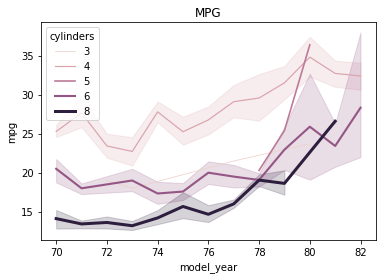

In [2]:
print('\nMPG\n')
print(df)
sns.lineplot(x='model_year',y='mpg', size = 'cylinders', hue = 'cylinders',data=df)
plt.title('MPG') 
print('\n')

In [3]:
"""
Splitting the dataset

training
validation
testing sets

"""

dfAlt = df.drop("origin", axis='columns') 
dfAlt = dfAlt.drop("name", axis='columns')
dfAlt = dfAlt.drop("displacement", axis='columns')

X = dfAlt.loc[:, ['model_year', 'horsepower', 'weight', 'cylinders']].to_numpy() # , 'horsepower', 'weight', 'acceleration', 'model_year'
print(X.shape)
Y = dfAlt.loc[:, ['mpg']].to_numpy()

# Train 75, Val 250, and Test 67
train_x, test_x, train_y, test_y = sklearn.model_selection.train_test_split(X, Y, test_size=0.19, random_state=42)
train_x, validation_x, train_y, validation_y = sklearn.model_selection.train_test_split(train_x, train_y, test_size=6.27/9.0, random_state=42)


# Normalize only on the training dataset statistics
y_normalizer = sklearn.preprocessing.StandardScaler().fit(train_y)
x_normalizer = sklearn.preprocessing.StandardScaler().fit(train_x) 

# Use these statistics to normalize all the splits in the dataset
train_x, validation_x, test_x = [x_normalizer.transform(x) for x in [train_x, validation_x, test_x]]
train_y, validation_y, test_y = [y_normalizer.transform(y) for y in [train_y, validation_y, test_y]]

x_features = train_x
# poly = PolynomialFeatures(degree=2)
# x_features = poly.fit_transform(train_x)
model = linear_model.LinearRegression()

model.fit(x_features,  train_y)

# yhat = model.predict(poly.transform(validation_x))
yhat = model.predict(validation_x)


print('r2', r2_score(y_normalizer.inverse_transform(validation_y), y_normalizer.inverse_transform(yhat)))
print('mse', mean_squared_error(y_normalizer.inverse_transform(validation_y), y_normalizer.inverse_transform(yhat), squared=False))
print('mae', mean_absolute_error(y_normalizer.inverse_transform(validation_y), y_normalizer.inverse_transform(yhat)))
# for metric, metric_name in zip([r2_score, lambda y, yhat: mean_squared_error(y, yhat, squared=False), mean_absolute_error], ['r2', 'rmse', 'mae']):
    
#     print(metric_name, metric(validation_y.reshape(-1), y_hat.reshape(-1)))


(392, 4)
r2 0.7791768725908019
mse 3.671212036527067
mae 2.8362865364351633


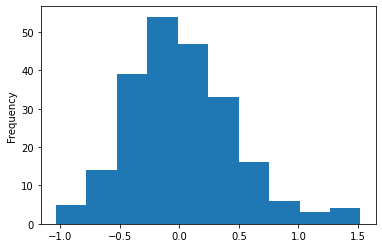

In [4]:
residual = (validation_y - yhat).reshape(-1)
pd.Series(residual).plot.hist()

In [5]:
validation_y.shape

(221, 1)

In [6]:
v = validation_y.reshape(-1, 1)
print(v.shape)

(221, 1)


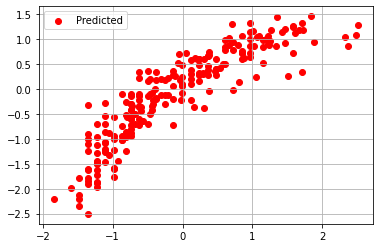

In [7]:
plt.scatter(validation_y.reshape(-1), yhat.reshape(-1), color='red', label='Predicted')
plt.legend()
plt.grid()

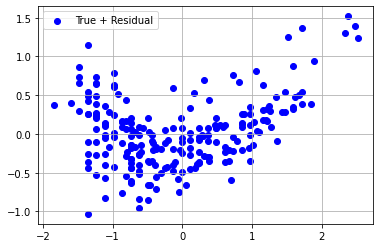

In [8]:
plt.scatter(validation_y.reshape(-1), residual, color='blue', label='True + Residual')
plt.legend()
plt.grid()